## Import Data

In [111]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [112]:
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
#!pip install xlrd==1.2.0 
# colab istedi normal jupyter de calisiyor aslinda

In [114]:
df=pd.read_excel('/content/drive/Othercomputers/My Laptop/0 Yaz Kampı/PBL1/12 - Clustering The Military Powers of Countries/World military power.xlsx')

In [115]:
df

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
0,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,...,Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan,5987.0
1,Albania,2.3137,Albania,19,Albania,0,Albania,0,Albania,0,...,Albania,"30,57,220",Albania,28748,Albania,362,Albania,41,Albania,691.0
2,Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22,Algeria,59,...,Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,6734.0
3,Angola,0.8379,Angola,295,Angola,72,Angola,18,Angola,30,...,Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600,Angola,1300,Angola,5369.0
4,Argentina,0.6521,Argentina,227,Argentina,24,Argentina,7,Argentina,9,...,Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989,Argentina,11000,Argentina,11968.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Venezuela,0.6449,Venezuela,260,Venezuela,38,Venezuela,0,Venezuela,52,...,Venezuela,"3,16,89,176",Venezuela,"9,12,050",Venezuela,2800,Venezuela,7100,Venezuela,5267.0
134,Vietnam,0.3559,Vietnam,293,Vietnam,77,Vietnam,0,Vietnam,38,...,Vietnam,"9,70,40,334",Vietnam,"3,31,210",Vietnam,3444,Vietnam,17702,Vietnam,4616.0
135,Yemen,1.2412,Yemen,169,Yemen,77,Yemen,0,Yemen,8,...,Yemen,"2,86,67,230",Yemen,"5,27,968",Yemen,1906,Yemen,0,Yemen,1601.0
136,Zambia,1.6464,Zambia,108,Zambia,18,Zambia,0,Zambia,11,...,Zambia,"1,64,45,079",Zambia,"7,52,618",NaN,NaN,Zambia,2250,Zambia,6043.0


In [116]:
drop_cols=df.iloc[:,2::2].columns # tekrar eden isim sutunlari
drop_cols

Index(['Aircraft Strength', 'Fighter/Interceptor Strength',
       'Attack Aircraft Strength', 'Transport Aircraft Fleet Strength',
       'Trainer Aircraft Fleet', 'Helicopter Fleet Strength',
       'Attack Helicopter Fleet Strength', 'Tank Strength', 'AFV/APC Strength',
       'Self-Propelled Artillery Strength', 'Towed Artillery Strength',
       'Rocket Projector Strength', 'Navy Fleet Strengths',
       'Aircraft Carrier Fleet Strength', 'Submarine Fleet Strength',
       'Destroyer Fleet Strength', 'Frigate Fleet Strength',
       'defense spending budget', 'External Debt', 'Airport Totals',
       'Oil Production', 'Oil Consumption', 'Proven Oil Reserves',
       'Available Manpower', 'Total Population', 'Total Square Land Area',
       'Total Coastline Coverage', 'Total Waterway Coverage',
       'Total Border Coverage'],
      dtype='object')

In [117]:
df.drop(columns=drop_cols, inplace=True)
df.rename(columns={'Military Strength':'Country'}, inplace=True)
df

,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,...,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
0,Afghanistan,1.3444,260,0,25,30,0,187,0,0,...,43,0,5500,0,"1,43,25,743","3,49,40,837","6,52,230",0,1200,5987.0
1,Albania,2.3137,19,0,0,0,0,19,0,0,...,4,16000,42500,"16,83,00,000","15,19,438","30,57,220",28748,362,41,691.0
2,Algeria,0.4659,551,103,22,59,87,257,45,880,...,157,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998,0,6734.0
3,Angola,0.8379,295,72,18,30,47,126,15,379,...,176,"16,66,000",82300,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600,1300,5369.0
4,Argentina,0.6521,227,24,7,9,64,100,0,370,...,1138,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989,11000,11968.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Venezuela,0.6449,260,38,0,52,82,86,10,390,...,444,"20,07,000","5,75,000","3,00,90,00,00,000","1,42,60,129","3,16,89,176","9,12,050",2800,7100,5267.0
134,Vietnam,0.3559,293,77,0,38,36,138,25,2615,...,45,"2,71,400","5,25,000","4,40,00,00,000","5,10,43,216","9,70,40,334","3,31,210",3444,17702,4616.0
135,Yemen,1.2412,169,77,0,8,21,61,14,620,...,57,12260,"1,45,000","3,00,00,00,000","1,12,66,221","2,86,67,230","5,27,968",1906,0,1601.0
136,Zambia,1.6464,108,18,0,11,52,27,0,75,...,88,0,21000,0,"61,66,905","1,64,45,079","7,52,618",NaN,2250,6043.0


## EDA

In [118]:
missing_props = df.isnull().mean(axis=0) # sutunlardaki nan eleman yuzdesi
drop_cols = missing_props[missing_props>0].index.values
drop_cols

array(['Navy Fleet Strengths value',
       'Aircraft Carrier Fleet Strength value',
       'Submarine Fleet Strength value', 'Destroyer Fleet Strength value',
       'Frigate Fleet Strength value', 'Total Coastline Coverage value',
       'Total Border Coverage value'], dtype=object)

In [119]:
df.drop(columns=drop_cols, inplace=True)

In [120]:
df.select_dtypes(include=object).sample(10)
# buradaki sayilar hint sayi sistemine ait: https://en.wikipedia.org/wiki/Indian_numbering_system

,Country,defense spending budget value,External Debt value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Waterway Coverage value
3,Angola,"7,00,00,00,000","42,08,00,00,000","16,66,000",82300,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1300
93,Paraguay,"25,00,00,000","17,70,00,00,000",0,30000,0,"33,72,366","70,25,763","4,06,752",3100
79,Myanmar,"2,65,00,00,000","6,59,40,00,000",12000,42600,"13,90,00,000","3,02,58,643","5,56,22,506","6,76,578",12800
109,South Africa,"4,27,80,00,000","1,56,30,00,00,000",2000,"6,05,000","1,50,00,000","2,62,50,220","5,53,80,210","12,19,090",0
57,Japan,"49,00,00,00,000","32,40,00,00,00,000",3841,"40,00,000","4,41,20,000","5,38,73,803","12,61,68,156","3,77,915",1770
24,Chad,"20,00,00,000","1,72,40,00,000","1,28,000","1,00,000","1,50,00,00,000","60,30,834","1,58,33,116","12,84,000",0
94,Peru,"2,56,00,00,000","66,25,00,00,000",43520,"2,10,000","47,30,00,000","1,53,52,302","3,13,31,228","12,85,216",8808
73,Mexico,"7,00,00,00,000","4,45,80,00,00,000","19,81,000","20,00,000","7,64,00,00,000","6,04,60,418","12,59,59,205","19,64,375",2900
17,Brazil,"27,80,00,00,000","5,47,40,00,00,000","26,22,000","30,20,000","13,00,00,00,000","10,77,64,996","20,88,46,892","85,14,877",50000
118,Syria,"1,80,00,00,000","4,98,90,00,000",14000,"2,60,000","2,50,00,00,000","1,24,50,728","1,94,54,263","1,85,180",900


In [121]:
object_cols = df.select_dtypes(include=object).columns.values
for i in object_cols:
  if i=='Country':
    continue
  df[i] = df[i].apply(lambda x: int(str(x).replace(',',''))) # indian system to international system

In [122]:
df

,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,...,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Waterway Coverage value
0,Afghanistan,1.3444,260,0,25,30,0,187,0,0,...,12000000000,2840000000,43,0,5500,0,14325743,34940837,652230,1200
1,Albania,2.3137,19,0,0,0,0,19,0,0,...,250000000,9505000000,4,16000,42500,168300000,1519438,3057220,28748,41
2,Algeria,0.4659,551,103,22,59,87,257,45,880,...,13000000000,6260000000,157,1306000,325000,12200000000,20741263,41657488,2381741,0
3,Angola,0.8379,295,72,18,30,47,126,15,379,...,7000000000,42080000000,176,1666000,82300,8273000000,6244205,30355880,1246700,1300
4,Argentina,0.6521,227,24,7,9,64,100,0,370,...,4200000000,214900000000,1138,479400,685000,2185000000,20179430,44694198,2780400,11000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Venezuela,0.6449,260,38,0,52,82,86,10,390,...,745000000,100300000000,444,2007000,575000,300900000000,14260129,31689176,912050,7100
134,Vietnam,0.3559,293,77,0,38,36,138,25,2615,...,5500000000,96580000000,45,271400,525000,4400000000,51043216,97040334,331210,17702
135,Yemen,1.2412,169,77,0,8,21,61,14,620,...,1400000000,7068000000,57,12260,145000,3000000000,11266221,28667230,527968,0
136,Zambia,1.6464,108,18,0,11,52,27,0,75,...,40000000,11660000000,88,0,21000,0,6166905,16445079,752618,2250


In [123]:
df.describe()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,...,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Waterway Coverage value
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,...,1.380000e+02,1.380000e+02,138.000000,1.380000e+02,1.380000e+02,1.380000e+02,1.380000e+02,1.380000e+02,1.380000e+02,138.000000
mean,1.460716,388.471014,81.565217,25.760870,30.231884,82.833333,154.065217,25.623188,646.565217,2485.695652,...,1.399363e+10,5.194983e+11,290.043478,5.855524e+05,7.020187e+05,1.194412e+10,2.544297e+07,5.318058e+07,9.546746e+05,5464.130435
std,1.324018,1231.981859,230.324777,94.528222,92.330436,240.803721,520.183631,97.326091,1515.463683,5410.546392,...,6.731189e+10,1.847252e+12,1212.967393,1.667139e+06,2.168810e+06,4.275090e+10,8.450698e+07,1.651090e+08,2.225571e+06,16494.534600
min,0.060600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.300000e+07,5.394000e+08,2.000000,0.000000e+00,2.000000e+03,0.000000e+00,1.327400e+05,5.979270e+05,6.970000e+02,0.000000
25%,0.574800,33.000000,0.000000,0.000000,3.000000,4.250000,15.250000,0.000000,19.250000,250.250000,...,3.255000e+08,9.361500e+09,33.500000,0.000000e+00,3.250000e+04,0.000000e+00,2.618384e+06,5.819450e+06,8.455325e+04,0.000000
50%,1.034100,111.000000,17.000000,0.000000,9.000000,26.000000,44.000000,2.000000,153.000000,734.500000,...,2.100909e+09,3.997000e+10,68.000000,1.313000e+04,1.335000e+05,8.028500e+07,5.986089e+06,1.613910e+07,3.054200e+05,875.000000
75%,2.021525,290.250000,60.500000,15.750000,26.000000,79.250000,126.750000,17.750000,436.250000,2000.000000,...,6.957750e+09,1.830250e+11,150.750000,2.228600e+05,3.487500e+05,2.001500e+09,1.756708e+07,4.068887e+07,7.929618e+05,3050.000000
max,10.168100,13264.000000,2085.000000,742.000000,945.000000,2643.000000,5768.000000,967.000000,12950.000000,39253.000000,...,7.500000e+11,1.791000e+13,13513.000000,1.058000e+07,2.000000e+07,3.009000e+11,7.528554e+08,1.384689e+09,1.709824e+07,110000.000000


In [124]:
abs(df.corr()['Military Strength Power Index']).sort_values(ascending=False)

Military Strength Power Index              1.000000
AFV/APC Strength value                     0.361796
Towed Artillery Strength value             0.335405
Tank Strength value                        0.324300
Fighter/Interceptor Strength value         0.310888
Trainer Aircraft Fleet value               0.284756
Oil Consumption value                      0.282414
Self-Propelled Artillery Strength value    0.268935
Aircraft Strength value                    0.267329
Transport Aircraft Fleet Strength value    0.267104
Oil Production value                       0.263961
Total Square Land Area value               0.258779
Rocket Projector Strength value            0.247800
Helicopter Fleet Strength value            0.244545
Total Population value                     0.242678
Attack Aircraft Strength value             0.241948
Total Waterway Coverage value              0.240222
Available Manpower value                   0.236737
External Debt value                        0.235734
Attack Helic

## Data Visualization

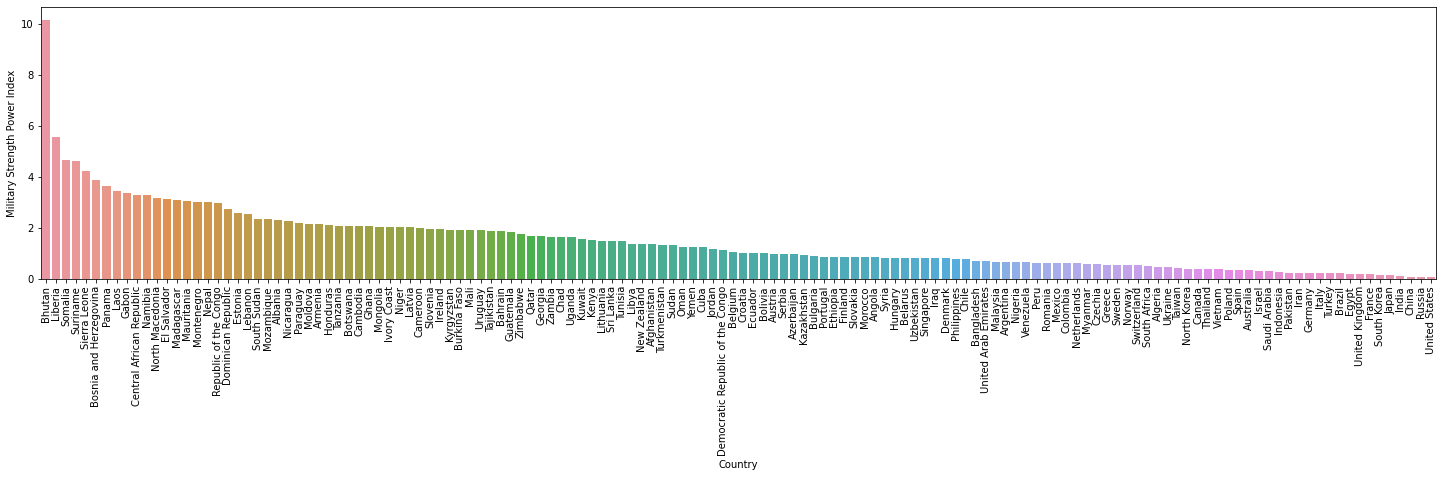

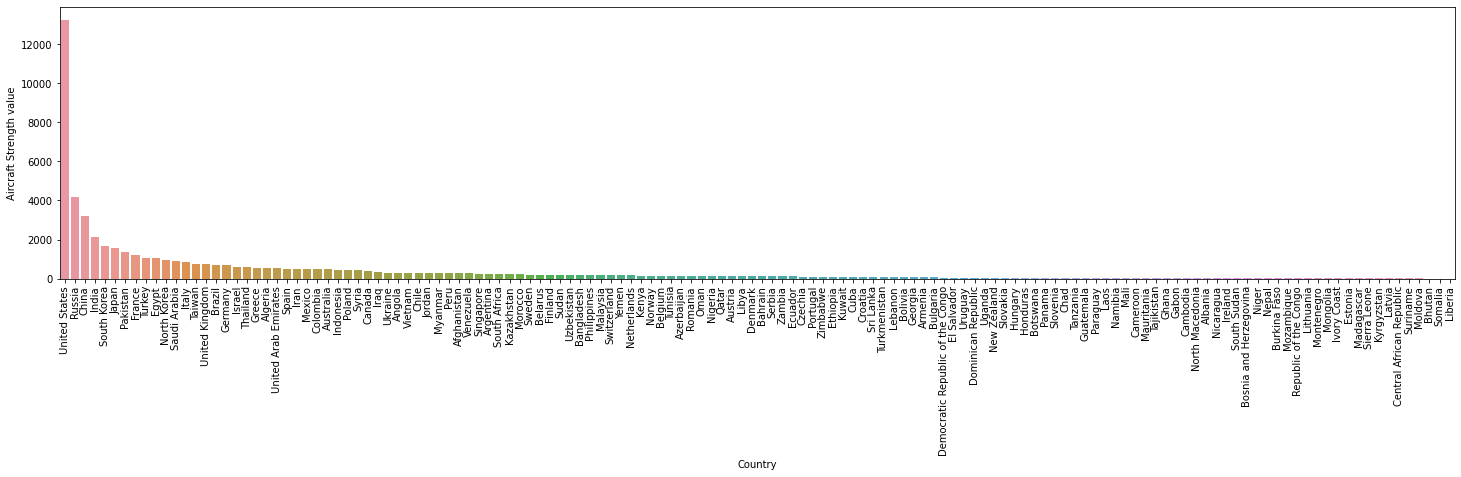

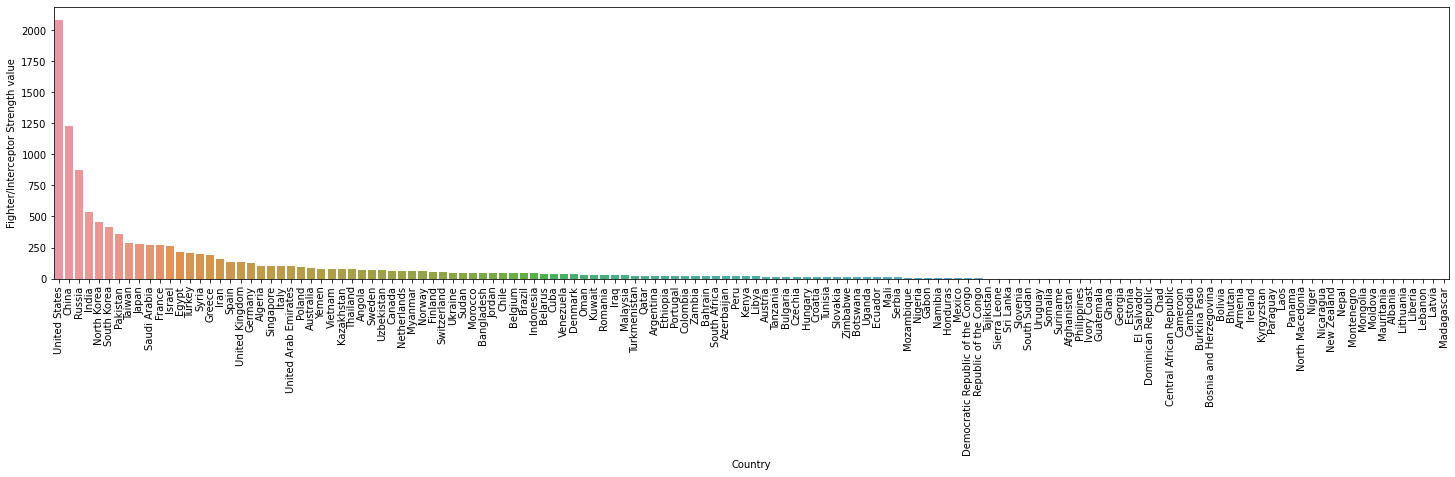

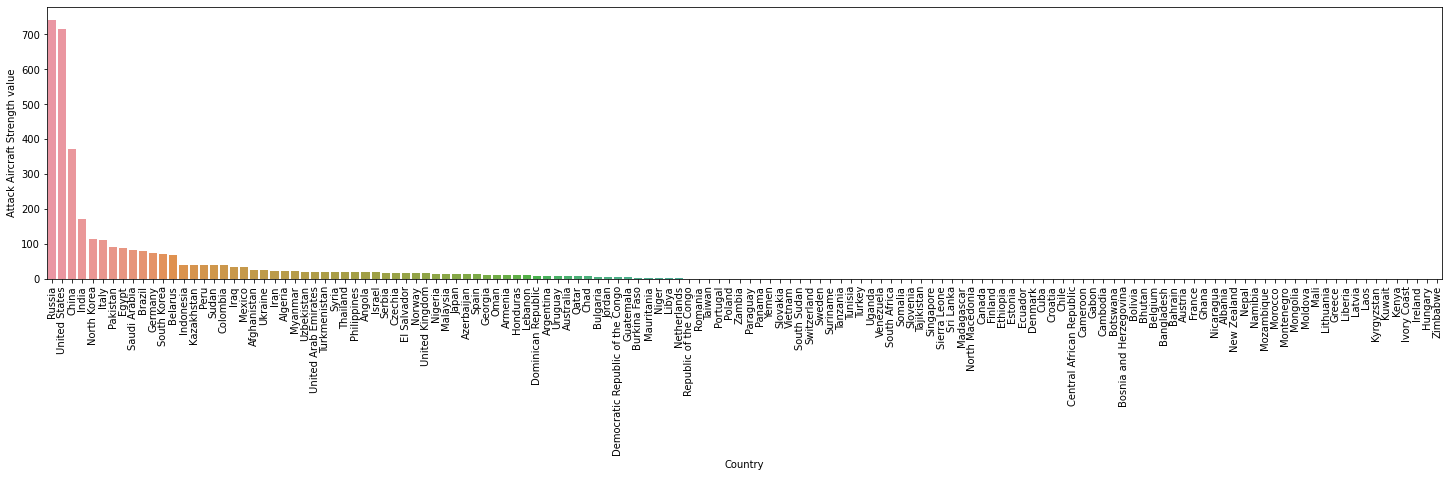

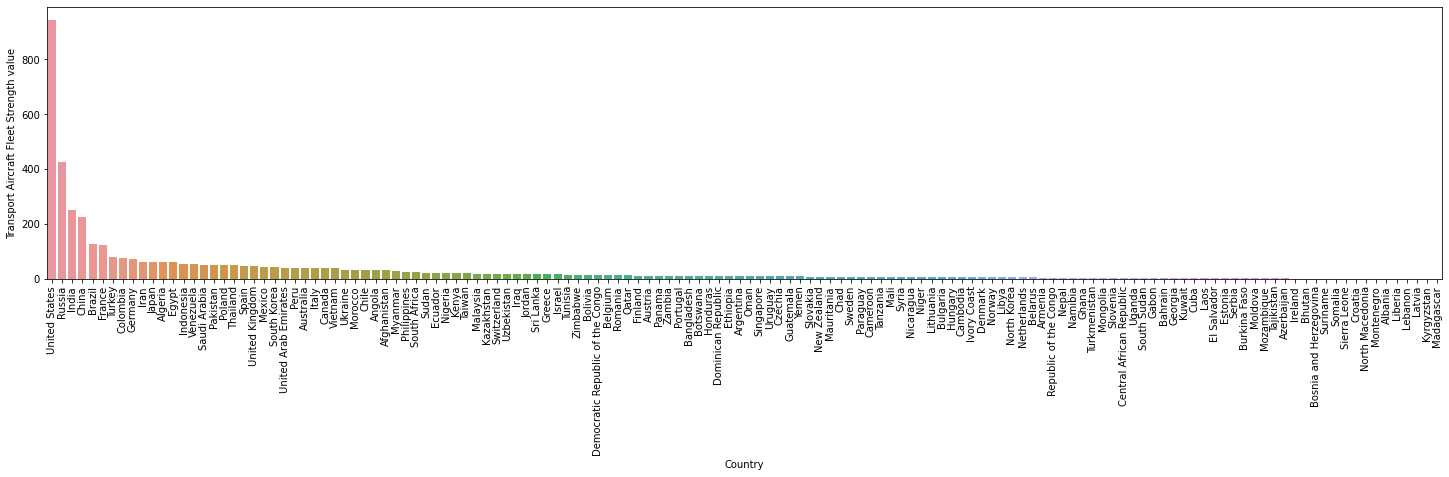

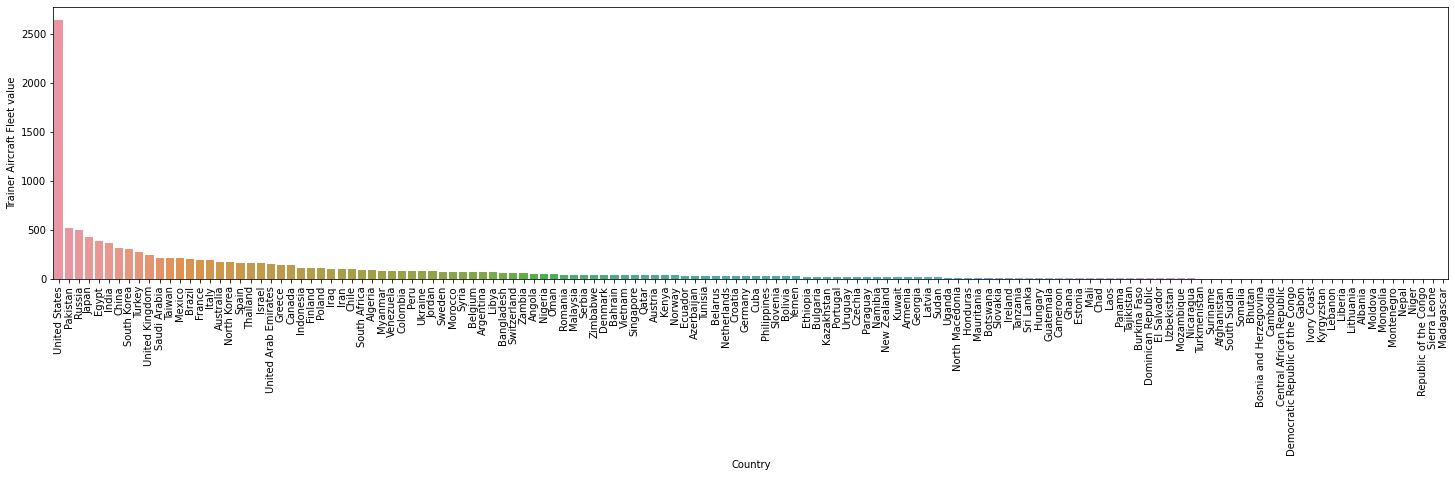

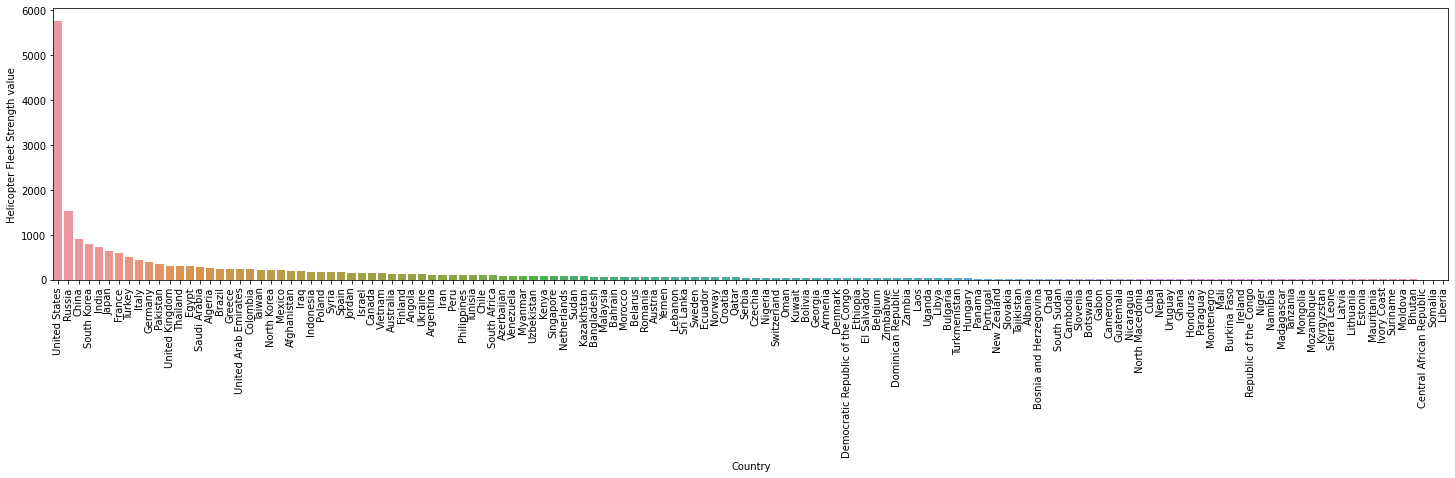

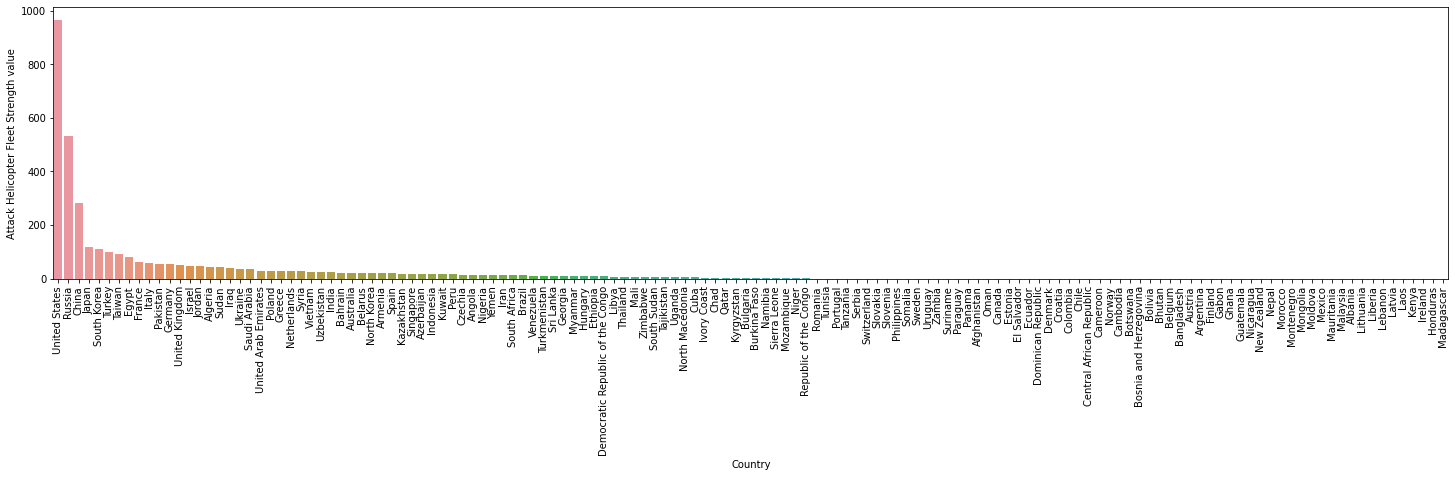

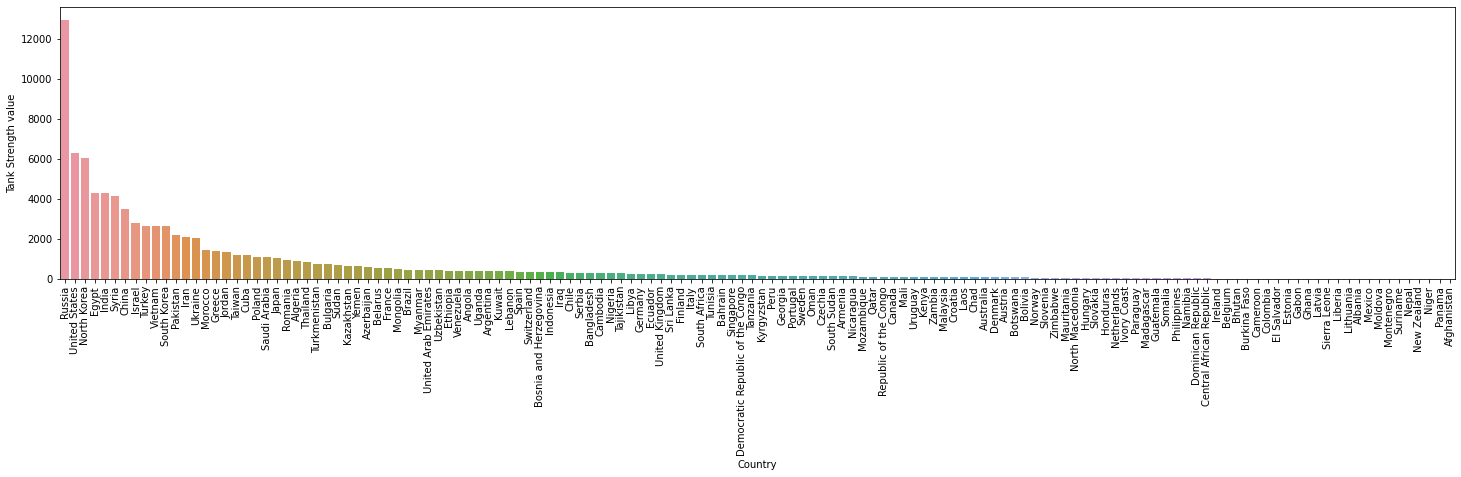

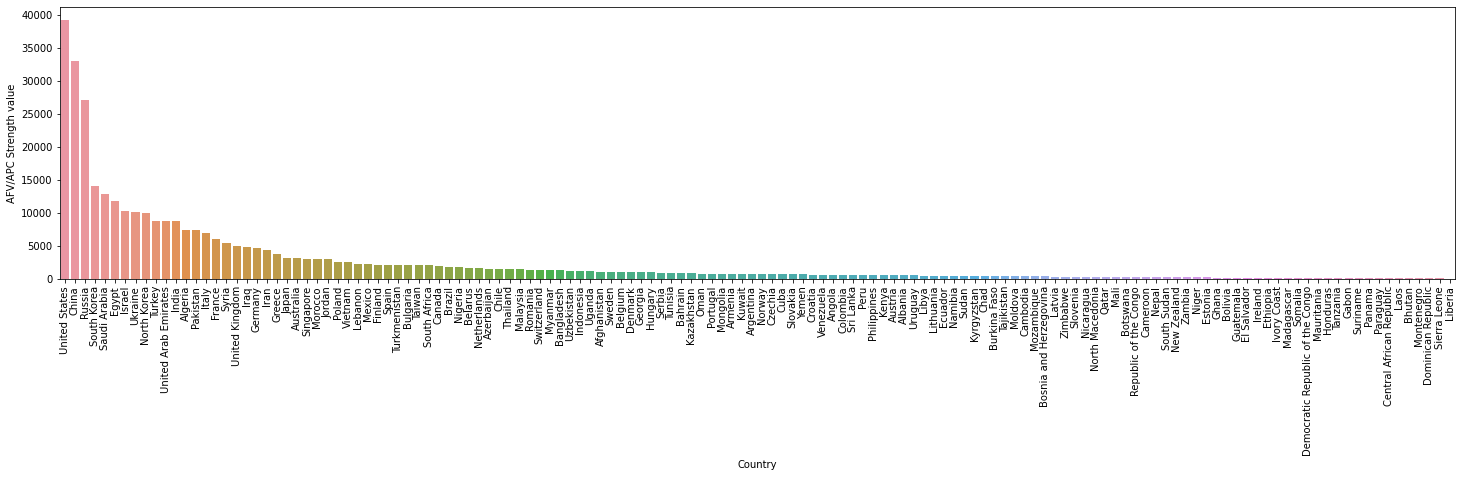

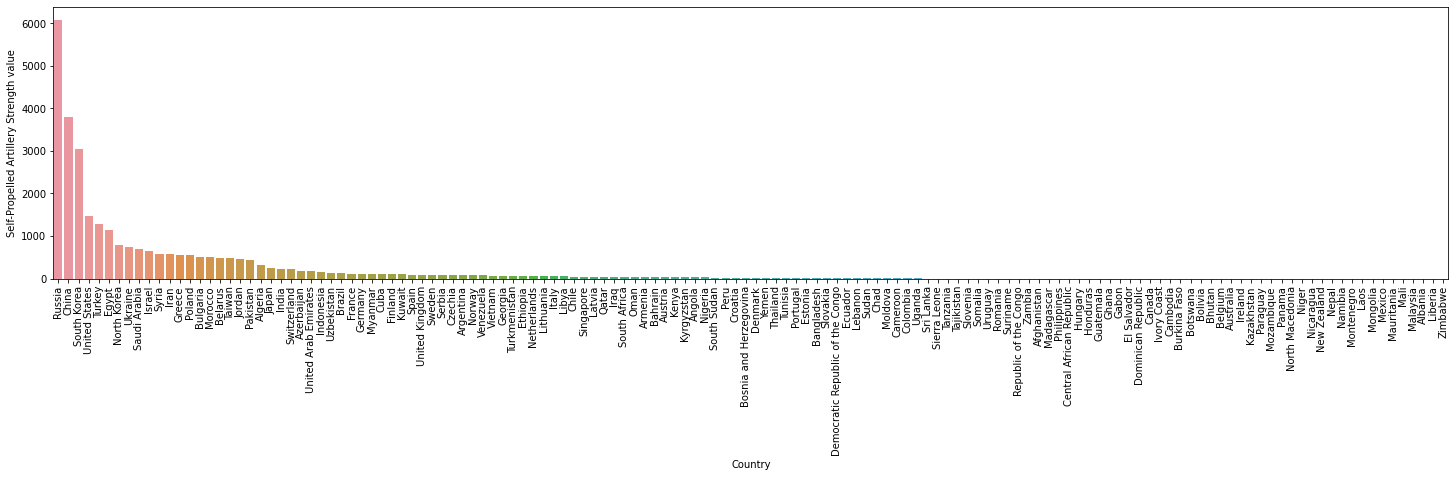

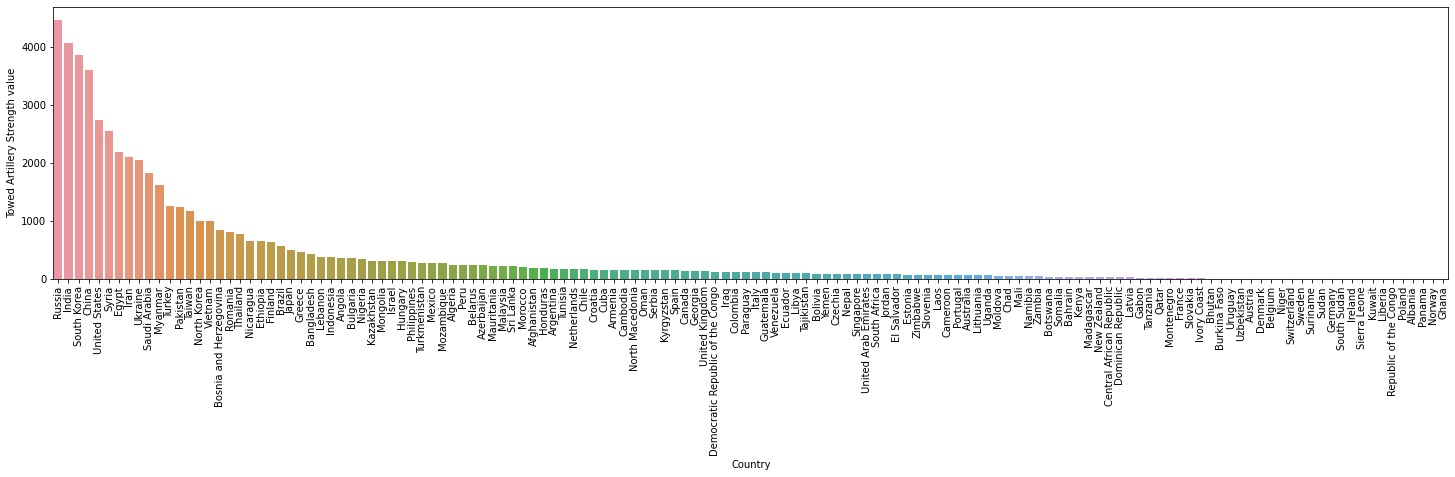

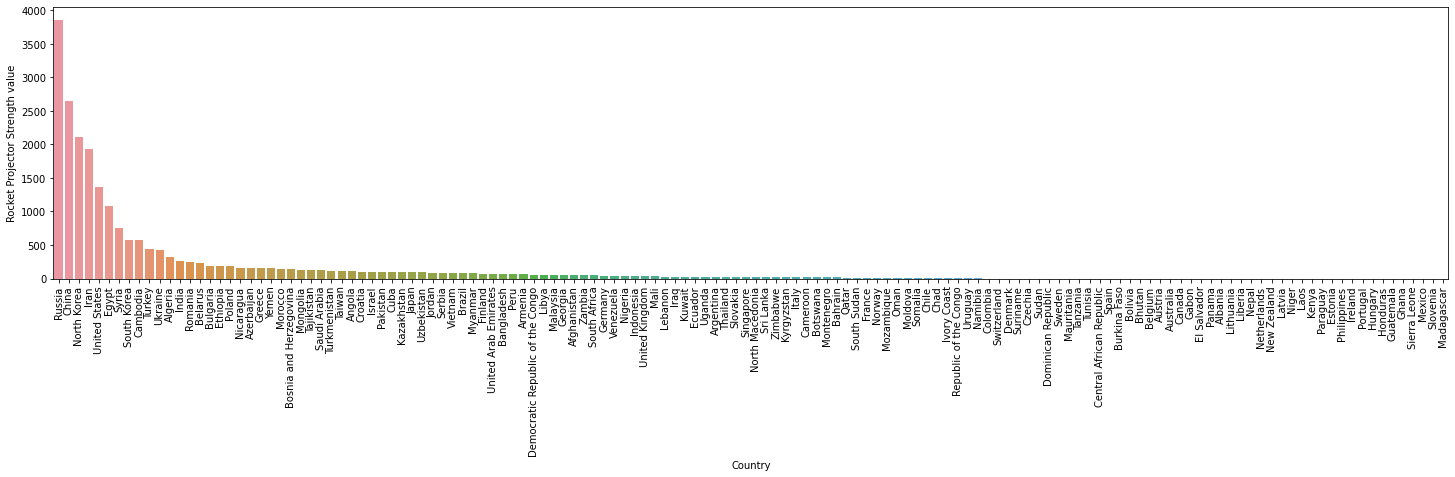

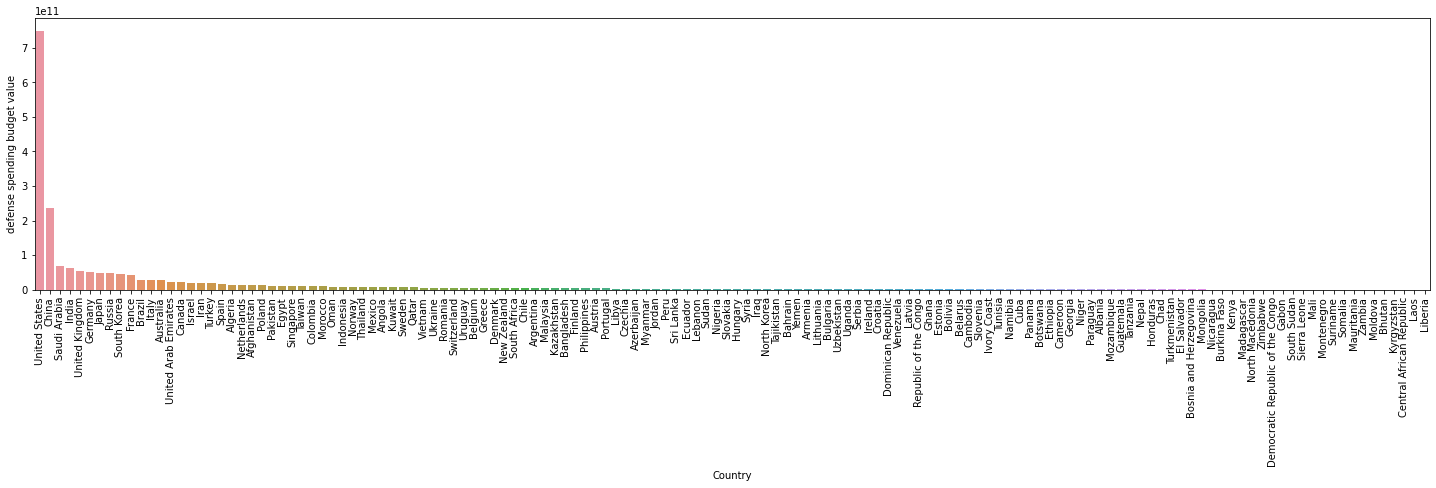

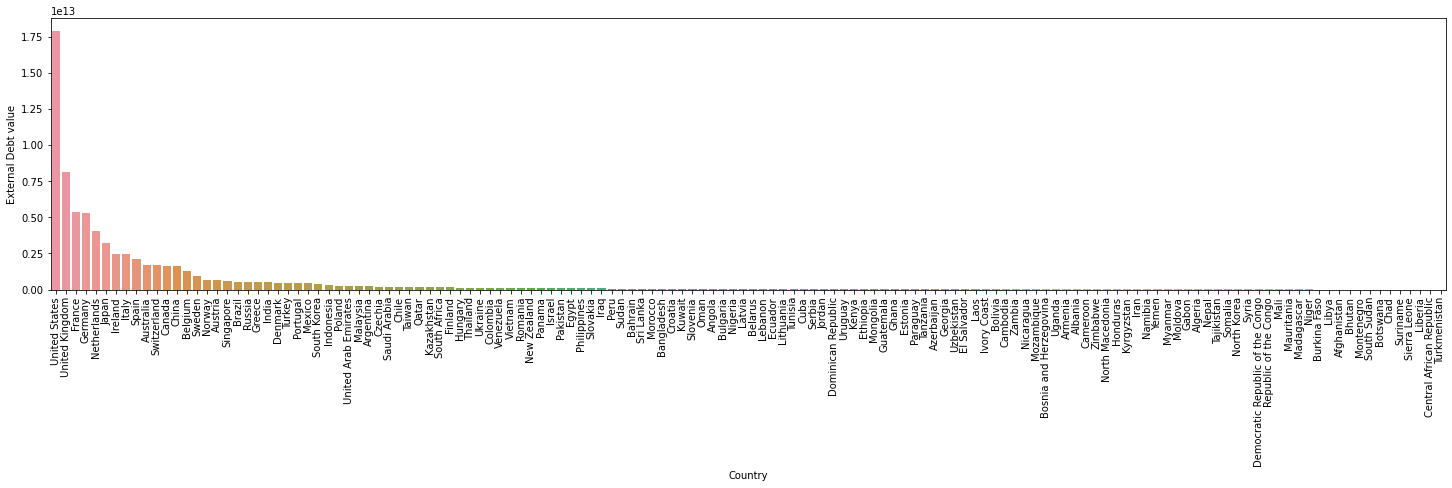

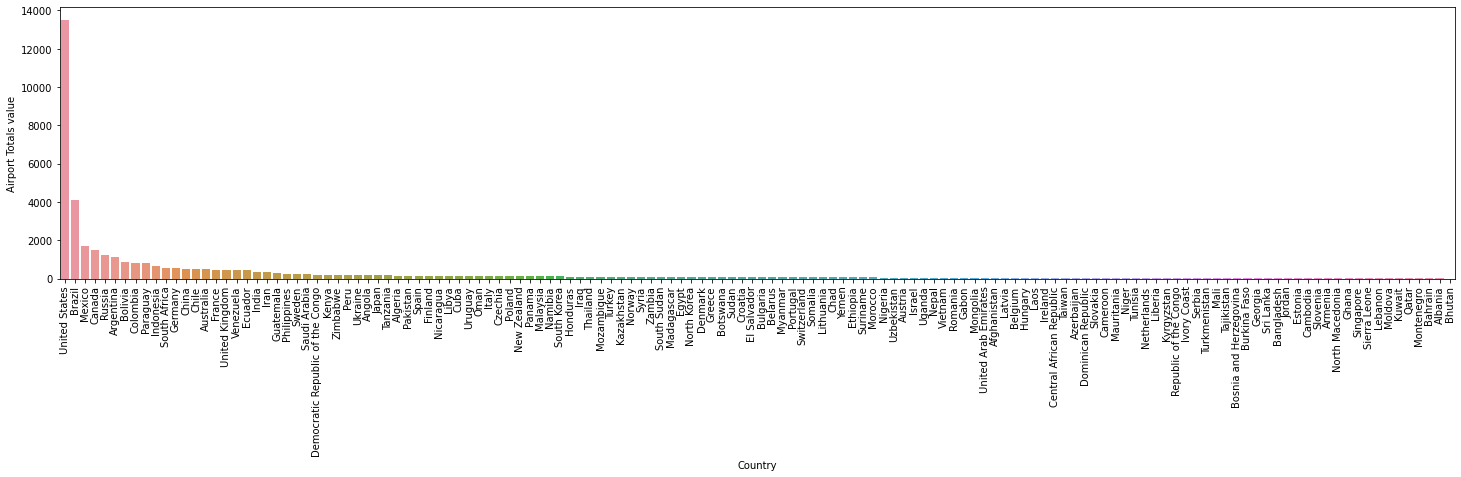

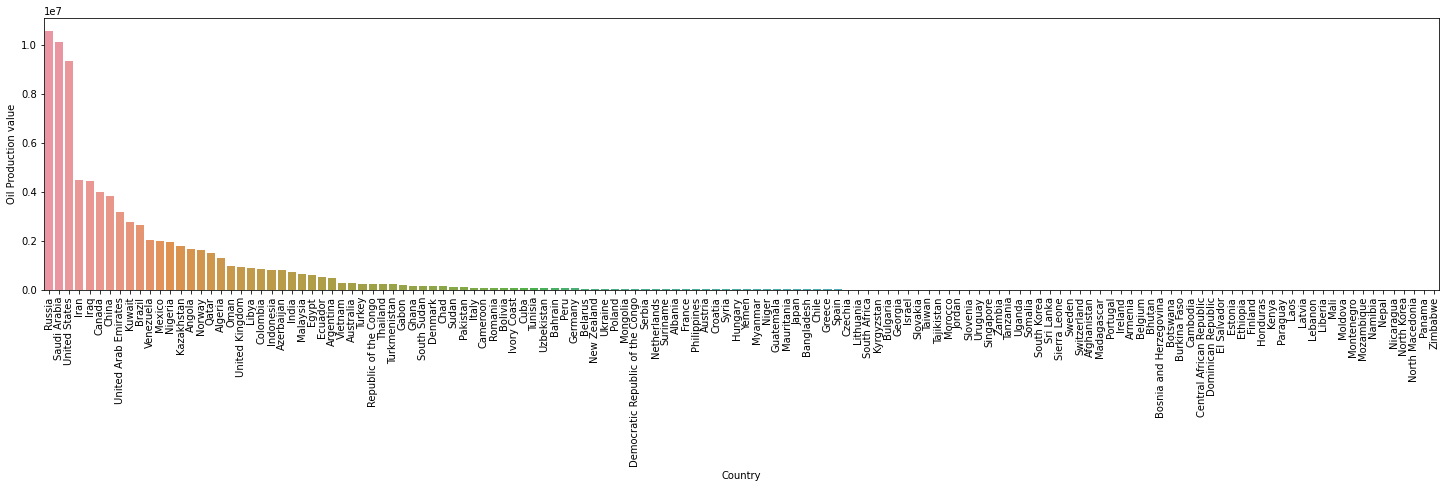

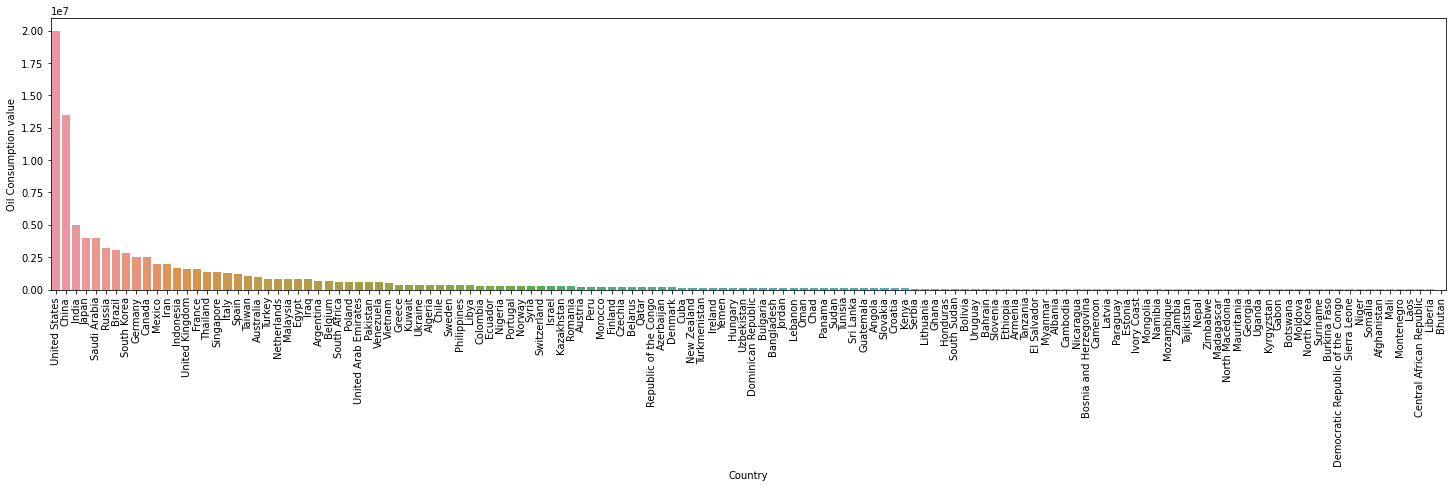

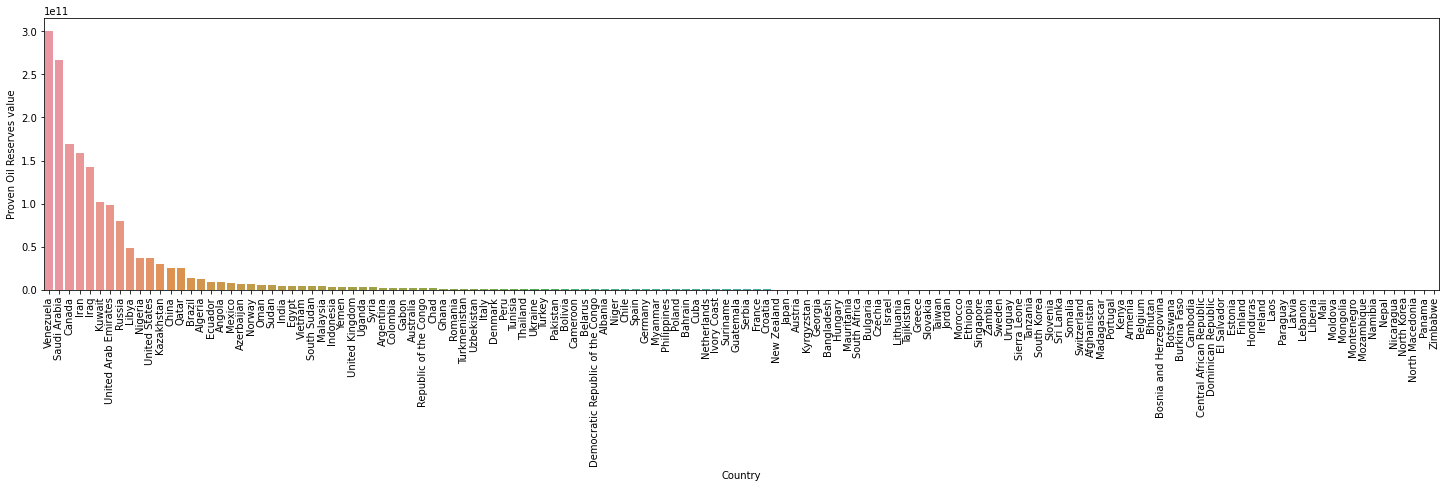

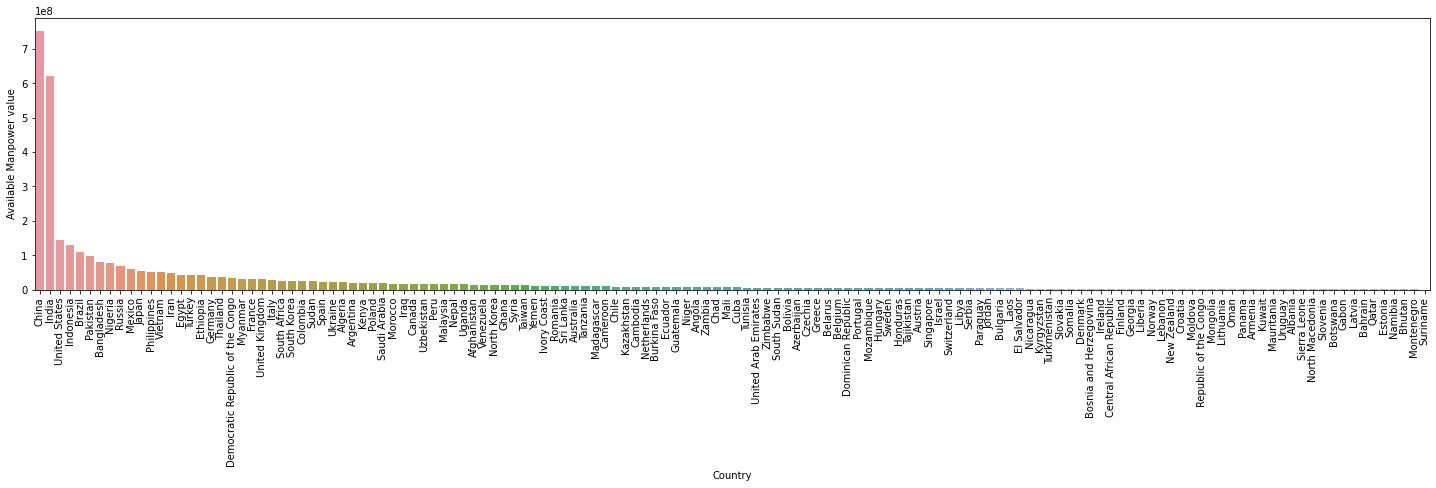

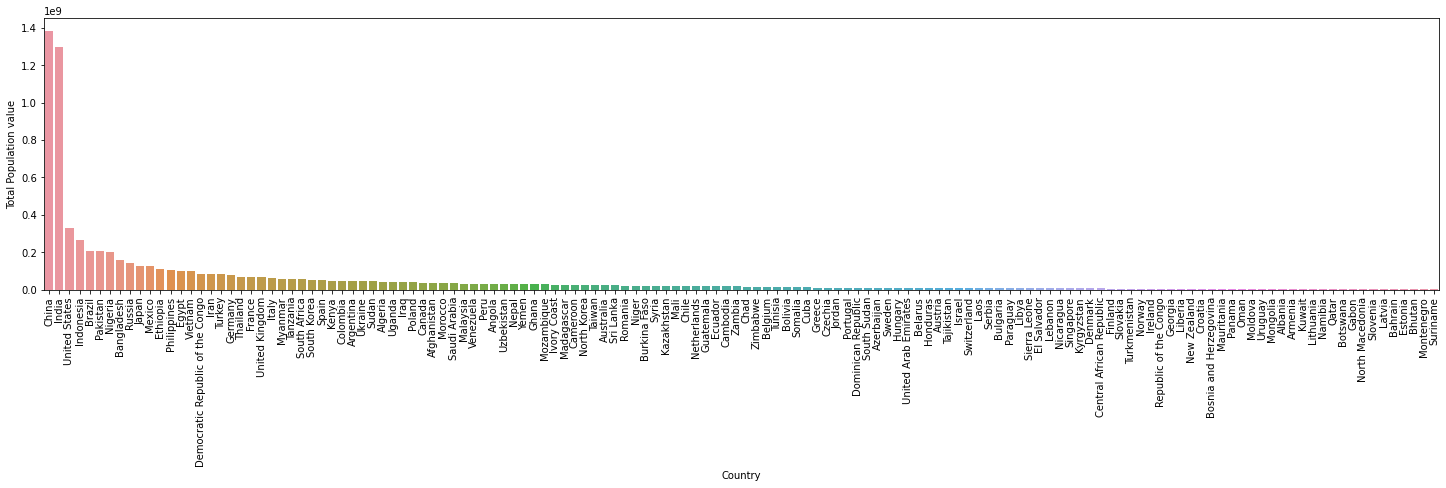

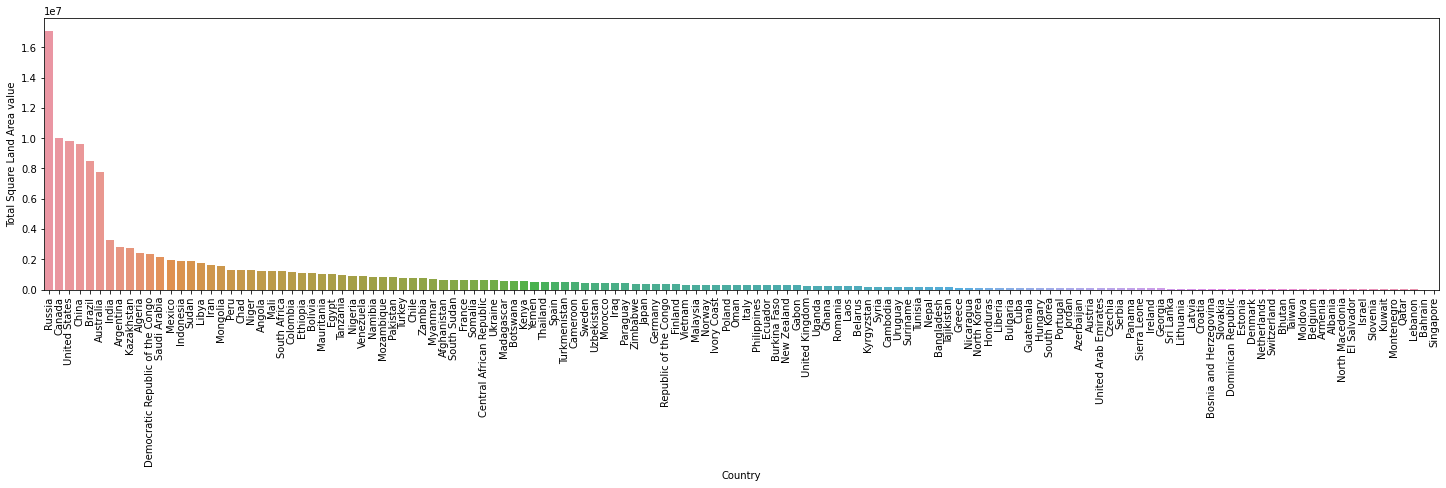

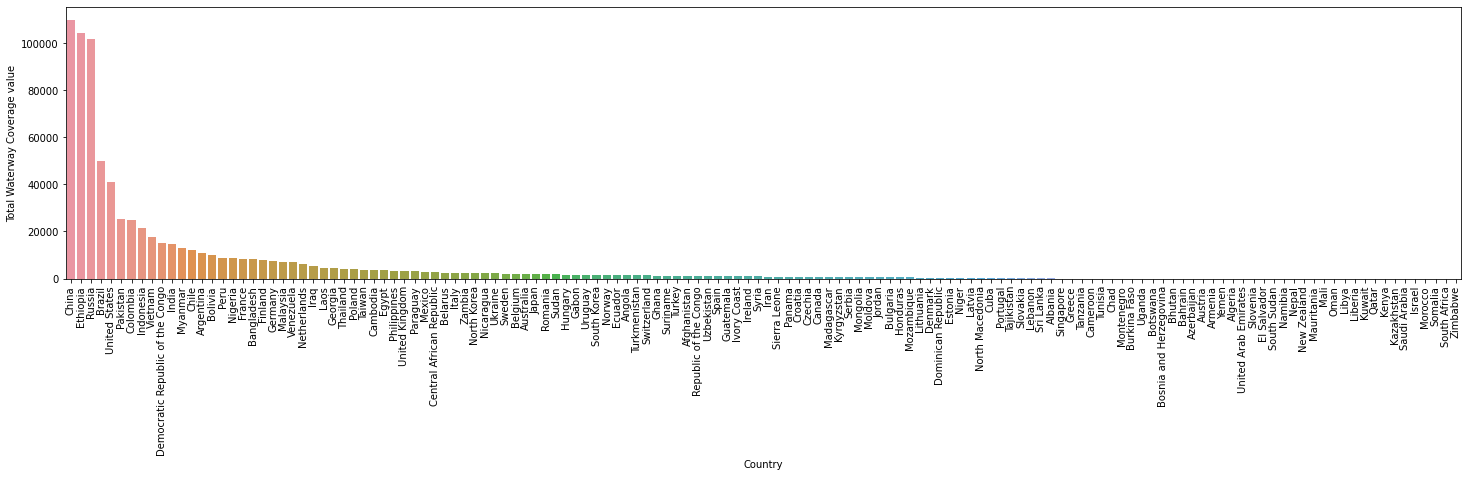

In [125]:
for i in df.columns.values:
  if i=='Country':
    continue
  plt.figure(figsize=(25,5))
  sns.barplot(x=df['Country'][df[i].sort_values(ascending=False).index.values], y=df[i].sort_values(ascending=False));
  plt.xticks(rotation=90)
  plt.show()

## Clustering

In [126]:
def cluster(x,clusters):
    allscore = []
    allclusters = []
    sum_of_squared_distances = []
    
    for i in np.arange(1,clusters):
        i+=1
        model=KMeans(n_clusters=i)
        pred=model.fit_predict(x)
        score=silhouette_score(x,pred)
        print("Number of cluster = {}, silhoutte = {}, inertia = {}".format(i, score, model.inertia_))
        allscore.append(score)
        allclusters.append(i)
        sum_of_squared_distances.append(model.inertia_)
        
    plt.figure(figsize=(10,10))
    plt.plot(allclusters,sum_of_squared_distances,marker='x',c='b');

Number of cluster = 2, silhoutte = 0.922715320613633, inertia = 1.591709282283396e+26
Number of cluster = 3, silhoutte = 0.8995442950361633, inertia = 4.208693510158405e+25
Number of cluster = 4, silhoutte = 0.8671436271439995, inertia = 1.5683101158001737e+25
Number of cluster = 5, silhoutte = 0.867519554074612, inertia = 7.956312590221068e+24
Number of cluster = 6, silhoutte = 0.774695334354781, inertia = 5.063468763465952e+24
Number of cluster = 7, silhoutte = 0.7817947546427736, inertia = 2.6142676782292796e+24
Number of cluster = 8, silhoutte = 0.7847423623940298, inertia = 1.516098509554167e+24
Number of cluster = 9, silhoutte = 0.6833747949746769, inertia = 1.172688937872081e+24
Number of cluster = 10, silhoutte = 0.6795886784648414, inertia = 8.333553436977309e+23


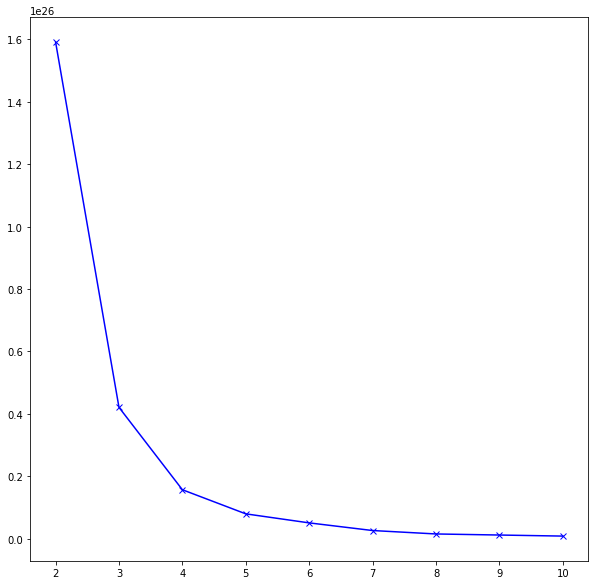

In [127]:
X=df.drop('Country',axis=1)
cluster(X,10)

In [128]:
model = KMeans(n_clusters=6)
pred = model.fit_predict(X)

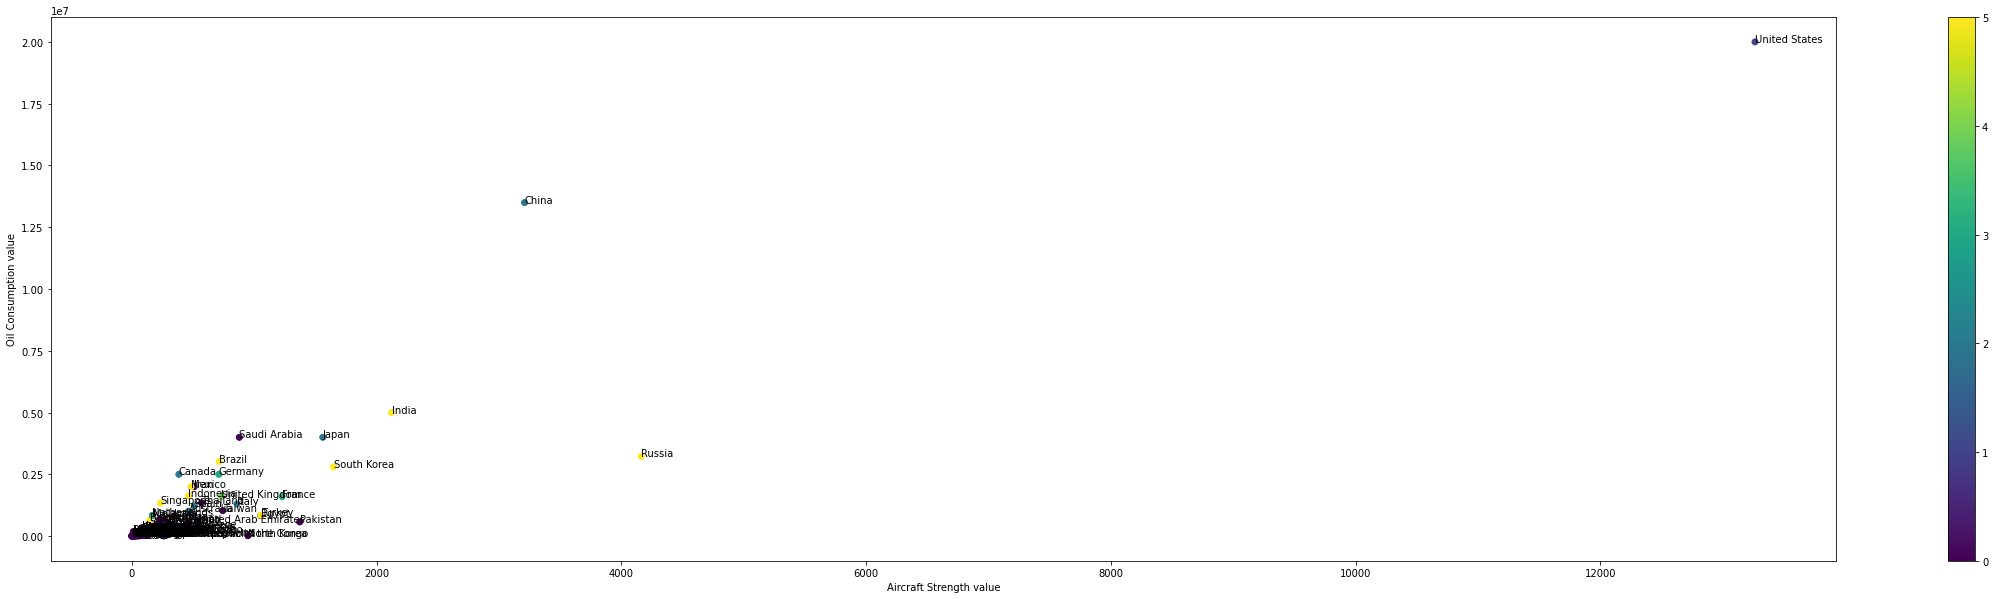

In [129]:
x=df['Aircraft Strength value'].values
y=df['Oil Consumption value'].values
plt.figure(figsize=(40,10))
plt.scatter(x, y, c=pred)
plt.xlabel('Aircraft Strength value')
plt.ylabel('Oil Consumption value')
plt.colorbar()
for i, txt in enumerate(df['Country'][df['Aircraft Strength value'].index.values]):
  a=plt.gca()
  plt.annotate(txt, (x[i],y[i]))
plt.show()

In [130]:
df['Cluster'] = pred
df.sample(20)

,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,...,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Waterway Coverage value,Cluster
129,United Kingdom,0.1717,733,133,15,44,241,312,49,227,...,8126000000000,460,910500,1600000,2564000000,29948413,65105246,243610,3200,4
33,Dominican Republic,2.7504,49,0,8,10,4,28,0,6,...,29160000000,36,0,125000,0,4819818,10298756,48320,350,0
8,Azerbaijan,0.9463,147,17,12,1,29,88,17,570,...,17410000000,37,789300,180000,7000000000,5042346,10046516,86600,0,0
45,Greece,0.5311,566,187,0,15,143,231,29,1355,...,506600000000,77,2753,350000,10000000,4993347,10761523,131957,6,5
131,Uruguay,1.8909,50,0,7,9,16,13,0,78,...,28370000000,133,0,55600,0,1549878,3369299,176215,1600,0
72,Mauritania,3.0477,28,0,2,6,9,4,0,35,...,4150000000,30,4000,18500,20000000,1555374,3840429,1030700,0,0
113,Sri Lanka,1.4661,77,0,0,15,6,54,9,202,...,51720000000,19,0,90000,0,10927071,22576592,65610,160,0
3,Angola,0.8379,295,72,18,30,47,126,15,379,...,42080000000,176,1666000,82300,8273000000,6244205,30355880,1246700,1300,0
104,Sierra Leone,4.2063,5,0,0,0,0,5,2,0,...,1615000000,8,0,9500,0,1432872,6312212,71740,800,0
118,Syria,0.8241,456,199,20,5,67,165,27,4135,...,4989000000,90,14000,260000,2500000000,12450728,19454263,185180,900,0
